The goal of this particular project is to perform Data analysis on SA protest data, to uncover the statistics or patterns that exist within the data. After performing the analysis, the second goal will be to build a model that will try establish a pattern as to what leads to protest and also perform predictions. Lastly, perform K-Means Clustering to see certain cluters that exist within the data set and discuss the cluster insight. 

In [248]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mat
import seaborn as sns

In [249]:
data = pd.read_csv('saprotest.csv')

# Data Exploration

In [250]:
def year(value):
    let = '2013'
    val = value.find(let)
    if (val != -1):
        return '2013'
    else:
        return '2014'

In [251]:
data['Year'] = data['Start_Date'].apply(year)

In [252]:
data.head()

,ISSID,Province,Municipality_metro,Metro,Rural,TownCity_Name,Suburbareaplacename,Police_Station,Coordinates,Latitude,...,Start_Date,End_Date,Ongoing,type,type_id,Violent_or_violent,violent,Rangecode,Reasonforprotest,Year
0,105,9,Western Cape - City of Cape Town,1,0,Cape Town,Khayelitsha; Town Two phase four informal sett...,WC - Khayelitsha,"-34.034239,18.677953",-34.034238,...,02/01/2013,02/12/2013,1,Service delivery,9,Violent,1,5,Protests during which people from other areas ...,2013
1,4,1,Eastern Cape - Senqu,0,1,Sterkspruit,Sterkspruit,EC - Sterkspruit,"-30.524935,27.364588",-30.524934,...,01/01/2013,01/24/2013,1,Service delivery,9,Violent,1,1,The residents wanted Sterkspruit to be moved f...,2013
2,67,6,KwaZulu Natal - eThekwini,1,0,Durban,"Dundee, Forbes & Manhattan Coal processing pla...",KZN - Dundee,"-28.170436,30.230345",-28.170435,...,01/17/2013,01/26/2013,1,Labour related,4,Violent,1,3,Decreased amount: the miners had initially bee...,2013
3,730,3,Gauteng - City of Tshwane,1,0,Pretoria,Pretoria West - Lotus Gardens,GP - Pretoria West,"-25.751159,28.083004",-25.751159,...,01/03/2013,01/03/2013,0,Vigilantism,7,Violent,1,5,"Residents stoned the house, smashed windows an...",2013
4,62,3,Gauteng - City of Johannesburg,1,0,Johannesburg,"Johannesburg, Nelson Mandela bridge",GP - Johannesburg Central,"-26.128008,28.03176",-26.128008,...,01/04/2013,01/04/2013,0,Crime related,1,Peaceful,0,3,The news of the death of South African mountai...,2013


In [255]:
data.columns

Index(['ISSID', 'Province', 'Municipality_metro', 'Metro', 'Rural',
       'TownCity_Name', 'Suburbareaplacename', 'Police_Station', 'Coordinates',
       'Latitude', 'Longitude', 'First_Street', 'Cross_Street', 'Start_Date',
       'End_Date', 'Ongoing', 'type', 'type_id', 'Violent_or_violent',
       'violent', 'Rangecode', 'Reasonforprotest', 'Year'],
      dtype='object')

### Heatmap for checking the null values that exist within the dataset

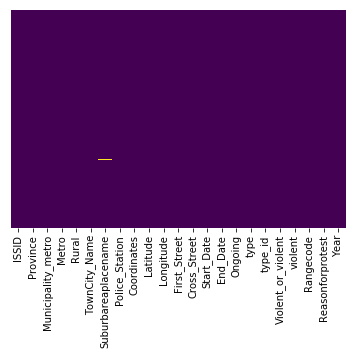

In [256]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# Discoverying the underlying Stats

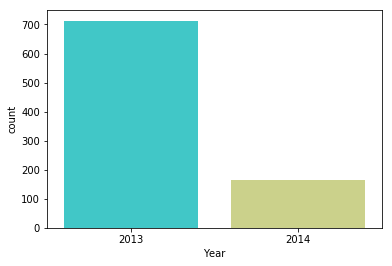

In [257]:
sns.countplot(x = 'Year', data=data,palette='rainbow')

In [258]:
data_2014 = data.loc[data['Year']== '2014']

In [259]:
data = data.loc[data['Year']== '2013']

### I am going to use year 2013 for analysis and predictions since it is the year with most protest records

### Violent Protests

Provinces: 1--> Eastern Cape; 2-->Free State;3-->Gauteng;4-->Northern cape;5-->North West;6-->Kwazulu Natal;7-->Mpumalanga;8-->Limpopo;9--> Western Cape

C:\Users\Mosima\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


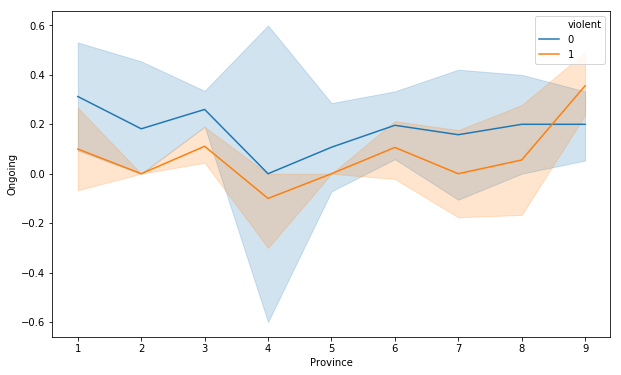

In [260]:
f, ax = mat.subplots(figsize=(10, 6))
sns.lineplot(x='Province', y = 'Ongoing' ,hue = 'violent', ax = ax , data = data )

Let's check which province have the most violent protest

In [261]:
violent = data.loc[data['violent'] == 1]

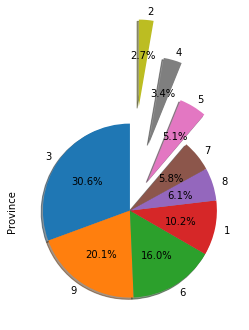

In [262]:
explode = (0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.8,1.2)
violent['Province'].value_counts().plot.pie(autopct='%1.1f%%', explode = explode, shadow=True, startangle=90)
mat.gca().set_aspect('equal')

### Peaceful Protests

Let's check which province have the most peaceful protest

In [263]:
peaceful = data.loc[data['violent'] == 0]

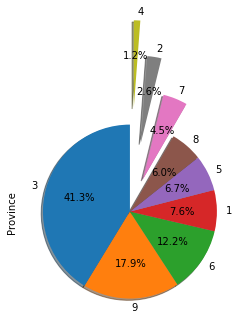

In [264]:
explode = (0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.8,1.2)
peaceful['Province'].value_counts().plot.pie(autopct='%1.1f%%',explode = explode ,shadow=True, startangle=90)
mat.gca().set_aspect('equal')

### Protest Reasons

Let's check the biggest reason for protest  

Reasons: 1-->Crime related; 2-->Education related; 3-->Election related; 4-->Labour related; 5-->Political causes;6-->Transport related; 7-->Vigilantism; 8-->Xenophobia; 9-->Service Delivery; 10-->Environment related; 11-->Individual causes


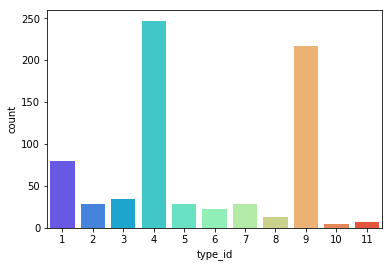

In [265]:
# checking biggest reason for protests and reason that is services delivery 
sns.countplot(x = 'type_id', data=data,palette='rainbow')

In [266]:
def Start(val):
    return int(val.split('/')[1])

In [267]:
start = data['Start_Date'].apply(Start)

In [268]:
def End(val):
    return int(val.split('/')[1])

In [269]:
End = data['End_Date'].apply(End)

In [270]:
data['Duration'] = abs(End - start)

In [271]:
data_sub = data[['Province','Metro', 'Rural', 'Ongoing', 'type_id', 'violent','Start_Date','Duration']]

### Protest Duration mean, standard deviation, and Max days

In [273]:
data_sub['Duration'].max()

29

In [274]:
data_sub['Duration'].mean()

1.1037868162692848

In [275]:
data_sub['Duration'].std()

3.7024740770959594

### Correlations

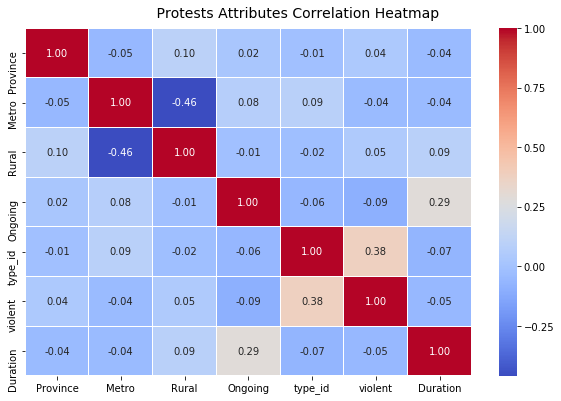

In [276]:
# There is little relationship between protest features, this might be because there is not an interpreted pattern for start of this protest  
f, ax = mat.subplots(figsize=(10, 6))
corr = data_sub.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle(' Protests Attributes Correlation Heatmap', fontsize=14)

### Correlation Cluster Map

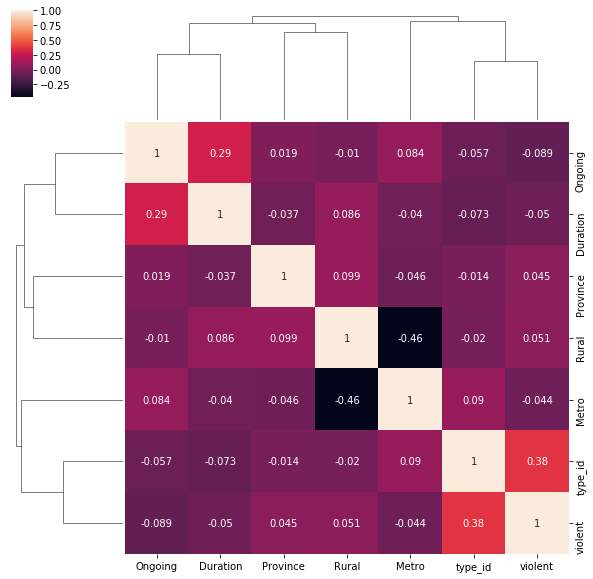

In [277]:
sns.clustermap(data_sub.corr(),annot=True)

In [278]:

data['Start_Date'] = data["Start_Date"].str.split("/", n = 1, expand = True)

In [279]:

def months(var):
    monthDict={'01':'Jan', '02':'Feb', '03':'Mar', '04':'Apr', '05':'May', '06':'Jun', '07':'Jul', '08':'Aug', '09':'Sep', '10':'Oct', '11':'Nov', '12':'Dec'}
    if (var < str(13)):
        return monthDict[var]

In [280]:
data['Start_Date'] = data['Start_Date'].apply(months)

### Density plot to check for duration protest distribution

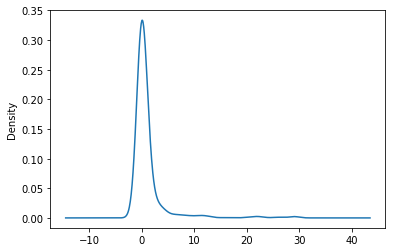

In [281]:
data['Duration'].plot.density()

### Countplot

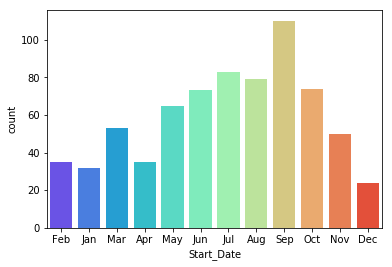

In [282]:
sns.countplot(x = 'Start_Date', data=data, palette='rainbow')

### Lineplot and Swarmplot

Let's check month and duration violent status 

C:\Users\Mosima\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


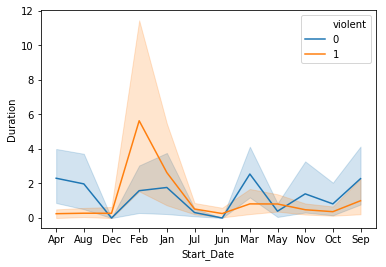

In [283]:
sns.lineplot(x='Start_Date', y = 'Duration' ,hue = 'violent',  data = data)

Check at which stage protests become violent

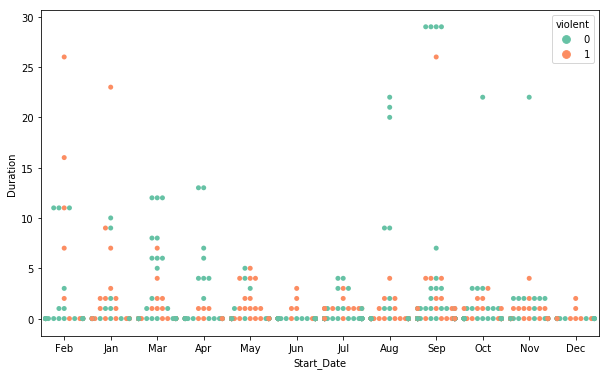

In [284]:
f, ax = mat.subplots(figsize=(10, 6))
sns.swarmplot(x='Start_Date',y='Duration',ax = ax,hue = 'violent',data=data,palette='Set2')

Check reason of protest in each month

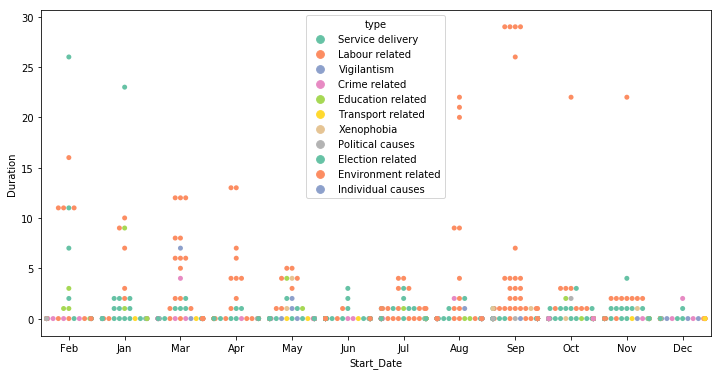

In [285]:
f, ax = mat.subplots(figsize=(12, 6))
sns.swarmplot(x='Start_Date',y='Duration',hue = 'type',ax = ax,data=data,palette='Set2')

### Lineplot

Check violent protests trend

C:\Users\Mosima\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


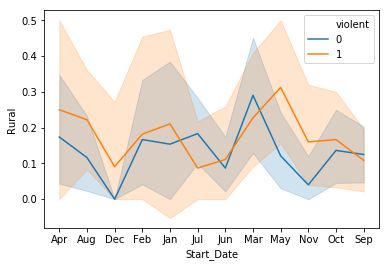

In [286]:
sns.lineplot(x='Start_Date', y = 'Rural' ,hue = 'violent',  data = data )

C:\Users\Mosima\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


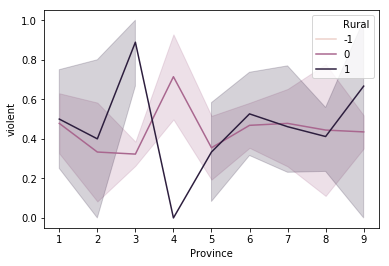

In [287]:
sns.lineplot(x='Province', y = 'violent' ,hue = 'Rural',  data = data )

### Model Building

On the bases that July, August, and September, have the highest number of protests overall. I am going to build the model based 
on them to solidify the reasons for any strong correlations or patterns

In [288]:
mon = data.loc[(data['Start_Date'] == 'Sep')|(data['Start_Date'] == 'Jul')|(data['Start_Date'] == 'Aug')]

In [289]:
# data to be used for model building
data_model = mon[['Province','Metro', 'Rural', 'Ongoing', 'type_id', 'violent','Start_Date','Duration']]

In [290]:
# converting Start Date months values to binary so that I can perform categorical predictions
month = pd.get_dummies(data = data_model['Start_Date'], drop_first = True)

In [291]:
data_1 = pd.concat([data_model,month],axis=1)

In [292]:
model = data_1.drop('Start_Date', axis = 1)

#### Let's check for model outliers

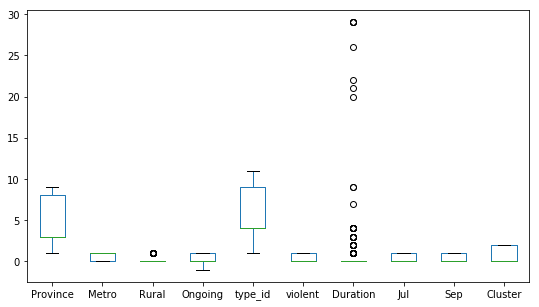

In [356]:
f, ax = mat.subplots(figsize = (9,5))
model.plot(kind='box', ax=ax)

We have outliers at Duration feature but this will not affect our model since it is not the focal point feature for model building.

### Logistics Regression Model

In [293]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split

#### Let's split up the data into training and  test set

In [294]:
X_train, X_test, y_train, y_test = train_test_split(model.drop('Sep',axis=1), 
                                                    model['Sep'], test_size=0.50)

In [295]:
#fitting train and test data into the model
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [296]:
#making predictions
predictions = logmodel.predict(X_test)

# Model Evaluation

In [297]:
# model coefficients
logmodel.coef_

array([[-5.60498084e-02,  9.95780866e-02,  1.21911370e-01,
         6.02292886e-01,  1.69193410e-05,  1.14040096e-01,
         7.05348650e-03, -2.63242105e+00]])

In [298]:
# indicates that the model is poor, best model must have log loss of less than 3
log_loss(y_test,predictions)

8.380891251196086

In [351]:
metrics.r2_score(y_test,predictions)

-0.03529411764705892

# Classication report

In [299]:
#Confussion matrix
print(confusion_matrix(y_test,predictions))

[[58 27]
 [ 6 45]]


### Confussion matrix results

The model was able to get out of total test data of 136, 103 predictions correct and 33 wrong. And this outcome is fairly poor results by the model. 

### Classifier

In [300]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.91      0.68      0.78        85
          1       0.62      0.88      0.73        51

avg / total       0.80      0.76      0.76       136



## Findings

The model have shown that:

(1) there does not exist any strong correlations between protest features;
(2) The does not exist any strong interpreted pattern to which protests occurance follow;
(3) Althoulgh the model yielded poor accuracy, we were able to extract that protests mostly occured from May to October;
(4) Services delivery and labour related protests erupt more than any other protest reasons;
(5) Most violent protests where recorded in gauteng province, followed by Western Cape province; 
(6) Most protests lasted for at least 1-4 days;
(7) Most protests in urban areas and these protests were labour related;
(8) Protests that occured in rural areas were very violent as they were mostly Services delivery and Xenophobic related;
(9) Lastly looking at the classification report, you will realize that the f-score value is less 90%, with also less than 90% precision level, and with log_loss greater than 3. This shows poor performance for the model predictions, and we could perhaps conclude that the protests occured randomly, and not according to any existing pattern;

##  Conclussion

The protests have got no ideal trend they just happen at random, but mostly at certain specific areas namely Gauteng
and Cape Town, and in certain months namely August and September

# Performing K Means Clustering

In [301]:
import pylab as pl

In [302]:
from sklearn.cluster import SpectralClustering

In [303]:
from sklearn.cluster import KMeans

In [327]:
kvalues = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in kvalues]

In [328]:
score = [kmeans[i].fit(model).score(model) for i in range(len(kmeans))]

#### The Elbow curve to assist pick the best suited number of clusters(K) 

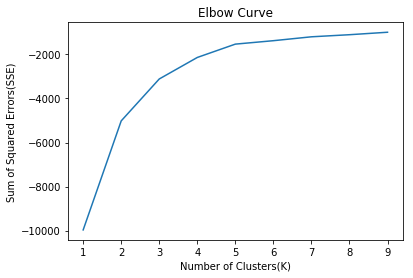

In [329]:
pl.plot(kvalues,score)
pl.xlabel('Number of Clusters(K)')
pl.ylabel('Sum of Squared Errors(SSE)')
pl.title('Elbow Curve')
pl.show()

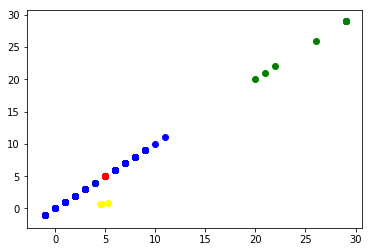

In [330]:
kmeans2=KMeans(n_clusters=3)
clusters=kmeans2.fit_predict(model)
model["Cluster"]=clusters

mat.scatter(model.loc[model.Cluster==0],model.loc[model.Cluster==0],color="red")
mat.scatter(model.loc[model.Cluster==1],model.loc[model.Cluster==1],color="green")
mat.scatter(model.loc[model.Cluster==2],model.loc[model.Cluster==2],color="blue")
mat.scatter(kmeans2.cluster_centers_[:,0],kmeans2.cluster_centers_[:,1],color="yellow")
mat.show()

### Cluster Insight

First lets check which cluster consist of mosts of most protest records.

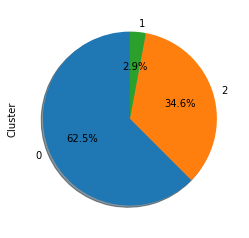

In [331]:
model['Cluster'].value_counts().plot.pie(autopct='%1.1f%%', shadow=True, startangle=90)
mat.gca().set_aspect('equal')

For the cluster insight I am going to use the dataset features value count to distiguish the cluters as to which cluster consist of which dominant records.

### Cluster 1

In [333]:
cluster_1 = model.loc[model['Cluster'] == 0]

In [334]:
cluster_1['Duration'].value_counts()

0    131
1     19
4      7
3      5
2      5
9      2
7      1
Name: Duration, dtype: int64

In [335]:
cluster_1['type_id'].value_counts()

4    106
1     25
5     15
2     11
3     10
6      3
Name: type_id, dtype: int64

In [336]:
cluster_1['Province'].value_counts()

3    75
9    27
1    16
6    15
8    12
5    12
7     7
4     4
2     2
Name: Province, dtype: int64

In [313]:
cluster_1['Rural'].value_counts()

0    80
1    14
Name: Rural, dtype: int64

In [337]:
cluster_1['violent'].value_counts()

0    125
1     45
Name: violent, dtype: int64

#### Cluster 1 insight

Let's look into cluster_1 which is the dominating cluster to the other two clusters. 

cluster_1 consists of protest that are mostly very peaceful from the urban sites of Gauteng province, and these protests erupt because of labour related issues. So, one of the reasons might be that employees demand salary rise. And these protest lasts at most for just 1-9 days. 

### Cluster 2

In [338]:
cluster_2 = model.loc[model['Cluster'] == 1]

In [339]:
cluster_2['Duration'].value_counts()

29    4
22    1
21    1
20    1
26    1
Name: Duration, dtype: int64

In [340]:
cluster_2['type_id'].value_counts()

4    8
Name: type_id, dtype: int64

In [341]:
cluster_2['Province'].value_counts()

3    3
1    2
8    2
9    1
Name: Province, dtype: int64

In [342]:
cluster_2['Rural'].value_counts()

0    5
1    3
Name: Rural, dtype: int64

In [343]:
cluster_2['violent'].value_counts()

0    7
1    1
Name: violent, dtype: int64

#### Cluster 2 insight

Let's look into cluster_2 which is cluster with the least amount of protest records.

The protest in this cluster are spread across several province Limpopo, Free State, and Gauteng. The reason for the protest is Xenophobia. The protests takes 26-29 days ongoing at most and they are rather violent.

### Cluster 3

In [344]:
cluster_3 = model.loc[model['Cluster'] == 2]

In [345]:
cluster_3['Duration'].value_counts()

0    82
1     9
2     2
3     1
Name: Duration, dtype: int64

In [346]:
cluster_3['type_id'].value_counts()

9     74
7     12
8      4
6      2
11     1
10     1
Name: type_id, dtype: int64

In [347]:
cluster_3['Province'].value_counts()

3    36
9    25
6    17
1     8
8     3
7     3
4     1
2     1
Name: Province, dtype: int64

In [348]:
cluster_3['Rural'].value_counts()

0    80
1    14
Name: Rural, dtype: int64

In [349]:
cluster_3['violent'].value_counts()

1    59
0    35
Name: violent, dtype: int64

#### Cluster 3 insight

Let's look at the second large cluster which is Cluster_3.

Most queries of this cluster are Services delivery and vigilantism related. The protests occurs at most across Gauteng, Western Cape, and Kwazulu Natal Provinces. The protests last for 1- 5 days, and they are violent in their nature. 